### Importing Essential Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Data Collection

In [4]:
df = pd.read_csv(r'predictive maintenance .csv')
df

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure
...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,No Failure
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,No Failure
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,No Failure
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,No Failure


In [5]:
df.columns = df.columns.str.replace(r'\[.*?\]', '', regex=True).str.strip()
print(", ".join(df.columns))

UDI, Product ID, Type, Air temperature, Process temperature, Rotational speed, Torque, Tool wear, Target, Failure Type


In [6]:
df

,UDI,Product ID,Type,Air temperature,Process temperature,Rotational speed,Torque,Tool wear,Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure
...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,No Failure
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,No Failure
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,No Failure
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,No Failure


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   UDI                  10000 non-null  int64  
 1   Product ID           10000 non-null  object 
 2   Type                 10000 non-null  object 
 3   Air temperature      10000 non-null  float64
 4   Process temperature  10000 non-null  float64
 5   Rotational speed     10000 non-null  int64  
 6   Torque               10000 non-null  float64
 7   Tool wear            10000 non-null  int64  
 8   Target               10000 non-null  int64  
 9   Failure Type         10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


In [8]:
df.describe()

,UDI,Air temperature,Process temperature,Rotational speed,Torque,Tool wear,Target
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000


In [9]:
for i in df.columns:
    print(i)
    print(df[i].nunique())
    print('________________________________________')

UDI
10000
________________________________________
Product ID
10000
________________________________________
Type
3
________________________________________
Air temperature
93
________________________________________
Process temperature
82
________________________________________
Rotational speed
941
________________________________________
Torque
577
________________________________________
Tool wear
246
________________________________________
Target
2
________________________________________
Failure Type
6
________________________________________


### Data Analysis & Visualization

In [11]:
df['Target'].value_counts()  

Target
0    9661
1     339
Name: count, dtype: int64

#### Machine Failure Rate

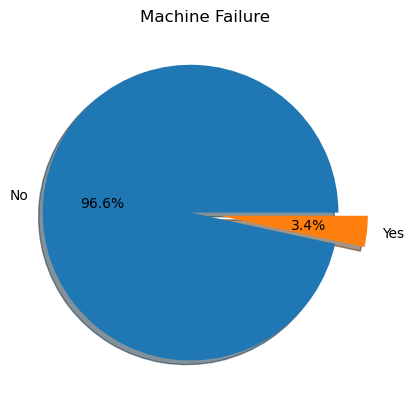

In [13]:
df['Target'].value_counts().plot.pie(explode=[0.1, 0.1], autopct='%.1f%%', labels=['No', 'Yes'],  shadow=True)
plt.title("Machine Failure") 
plt.ylabel('')    
plt.show()

#### Failure Types

In [15]:
failure_type_counts = df['Failure Type'].value_counts()
failure_type_counts.columns = ['Failure Type', 'Count']

failure_type_table = pd.DataFrame(failure_type_counts)
print(failure_type_table)

                          count
Failure Type                   
No Failure                 9652
Heat Dissipation Failure    112
Power Failure                95
Overstrain Failure           78
Tool Wear Failure            45
Random Failures              18


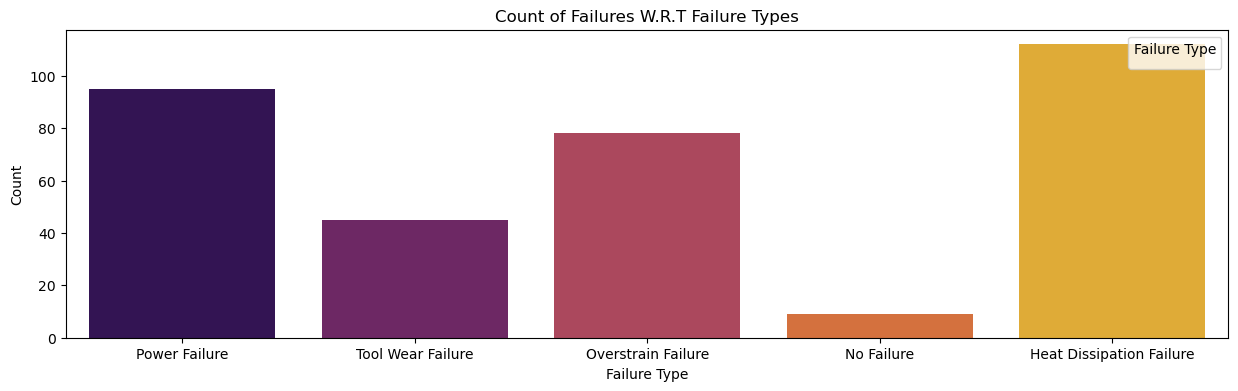

In [16]:
plt.figure(figsize=(15, 4))
sns.countplot(data=df[df['Target'] == 1], x="Failure Type", hue="Failure Type", palette="inferno", dodge=False)
plt.title("Count of Failures W.R.T Failure Types")
plt.xlabel("Failure Type")
plt.ylabel("Count")
plt.legend(title="Failure Type", loc="upper right")
plt.show()

#### low medium and high quality products

In [18]:
pd.DataFrame(df["Type"].value_counts())

,count
Type,
L,6000
M,2997
H,1003


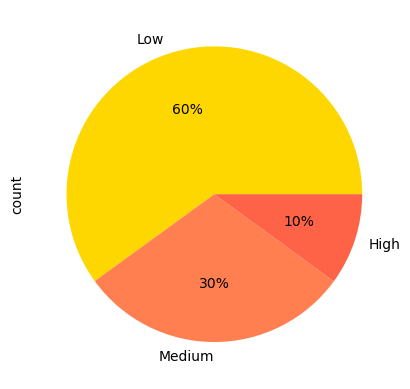

In [19]:
df['Type'].value_counts().plot.pie(autopct='%.f%%', colors=['gold', 'coral', 'tomato'], labels=['Low', 'Medium', 'High'])
plt.show()

#### Data Distribution

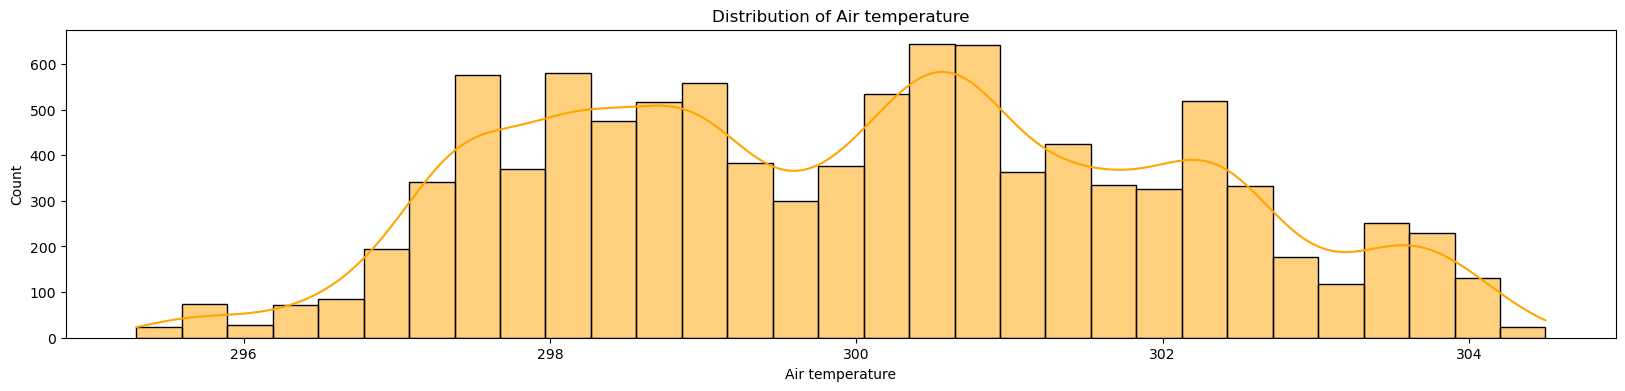

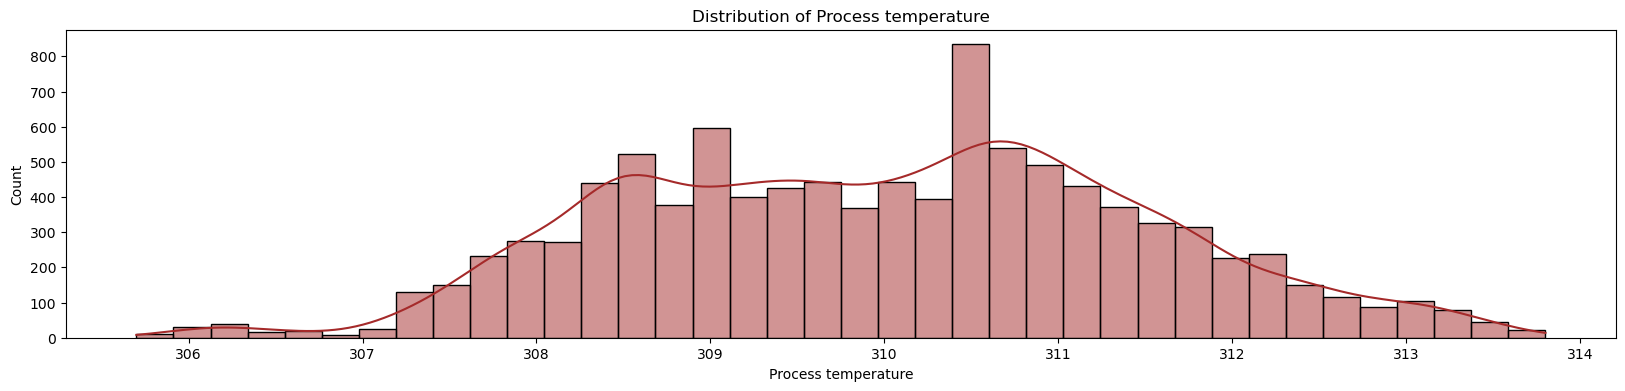

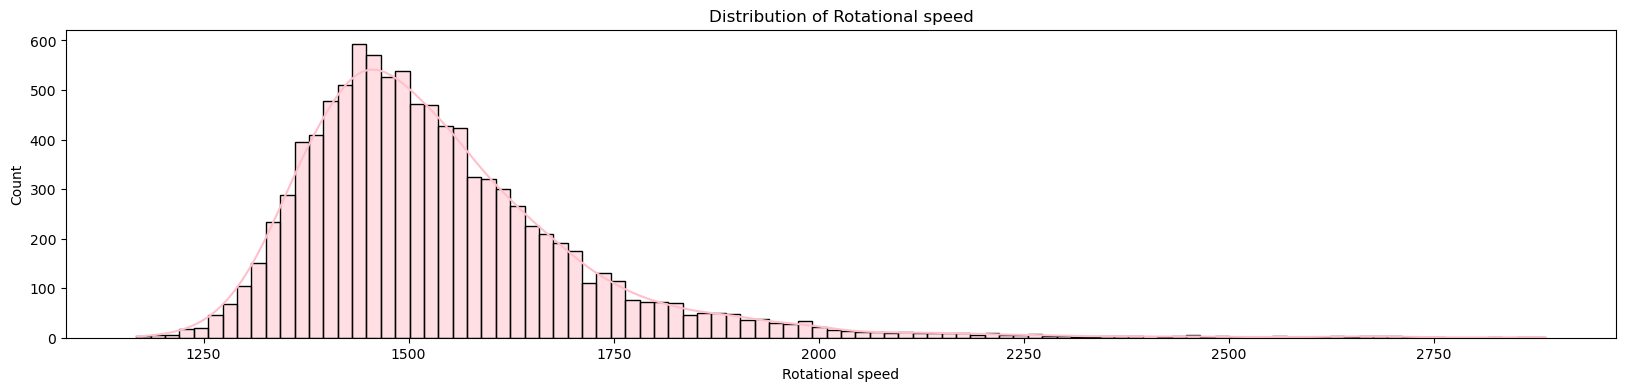

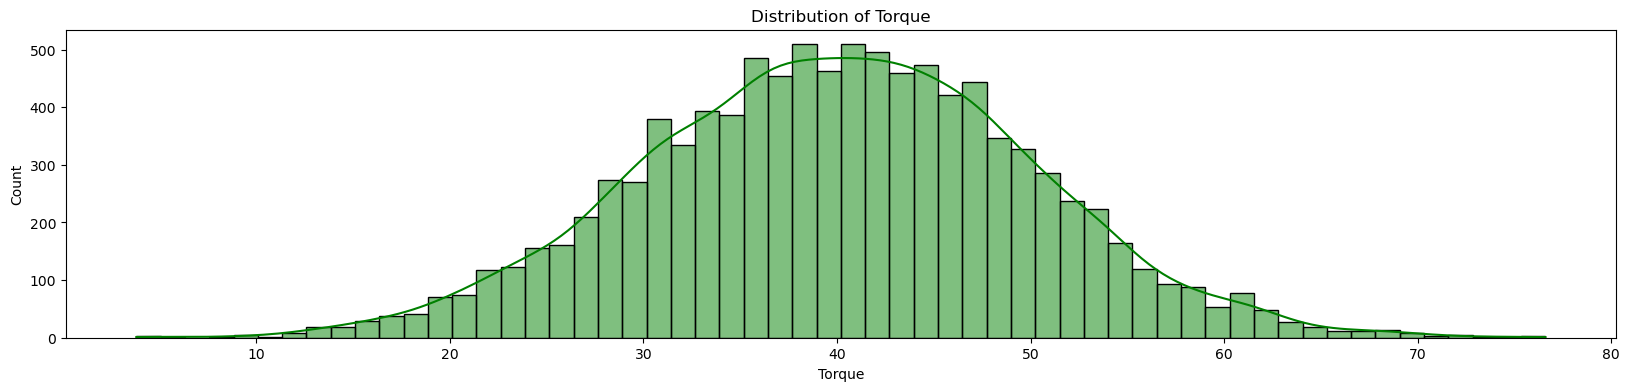

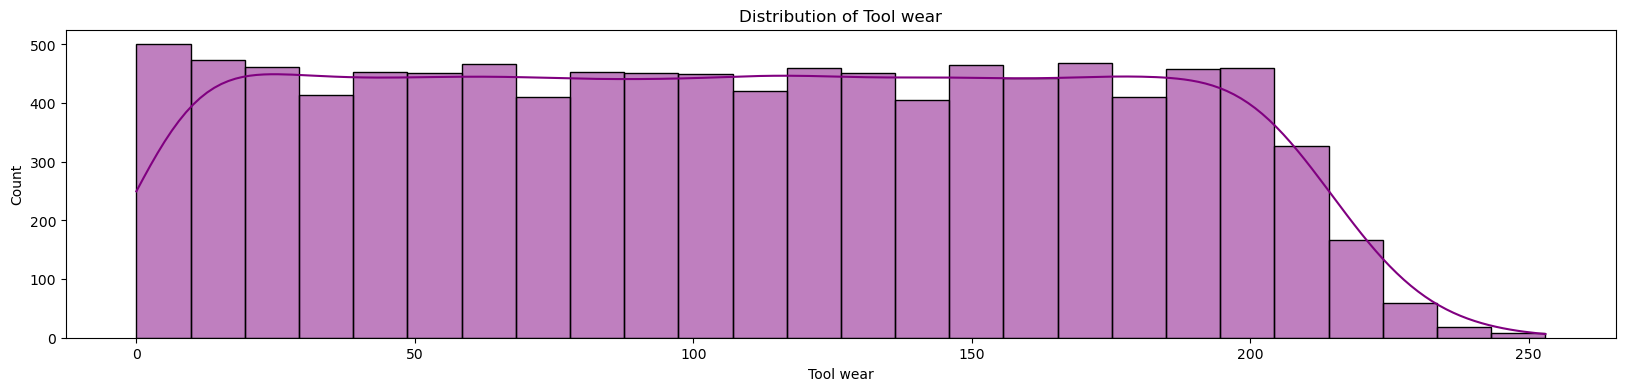

In [21]:
colors = {'Air temperature': 'orange',
    'Process temperature': 'brown',
    'Rotational speed': 'pink',
    'Torque': 'green',
    'Tool wear': 'purple'}
for col in colors:
    plt.figure(figsize=(20, 4))
    sns.histplot(df[col], kde=True, color=colors[col])
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

#### Correlation

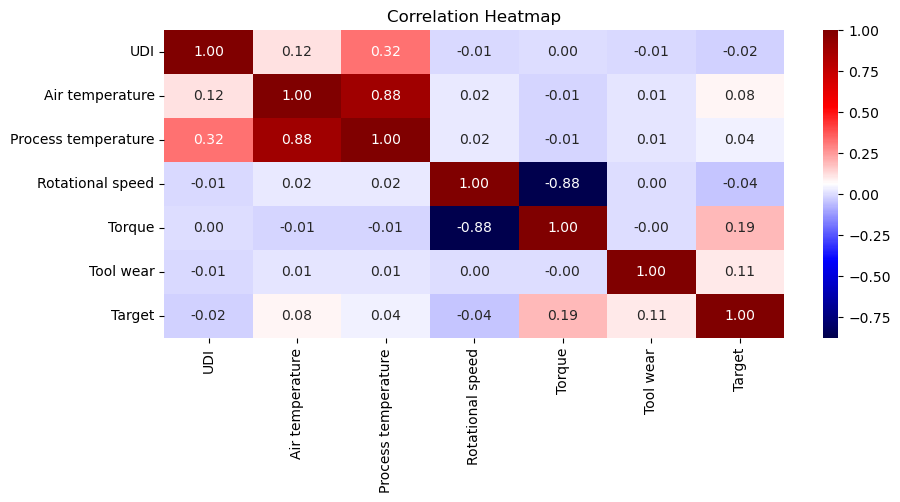

In [23]:
numeric_df = df.select_dtypes(include='number')
corr = numeric_df.corr()
plt.figure(figsize=(10, 4))
heatmap = sns.heatmap(corr, annot=True, fmt=".2f", cmap='seismic', cbar=True)
plt.title('Correlation Heatmap')
plt.show()

In [24]:
df.columns

Index(['UDI', 'Product ID', 'Type', 'Air temperature', 'Process temperature',
       'Rotational speed', 'Torque', 'Tool wear', 'Target', 'Failure Type'],
      dtype='object')

In [25]:
df.drop(['UDI','Product ID','Failure Type'],axis=1,inplace=True)

In [26]:
df.columns

Index(['Type', 'Air temperature', 'Process temperature', 'Rotational speed',
       'Torque', 'Tool wear', 'Target'],
      dtype='object')

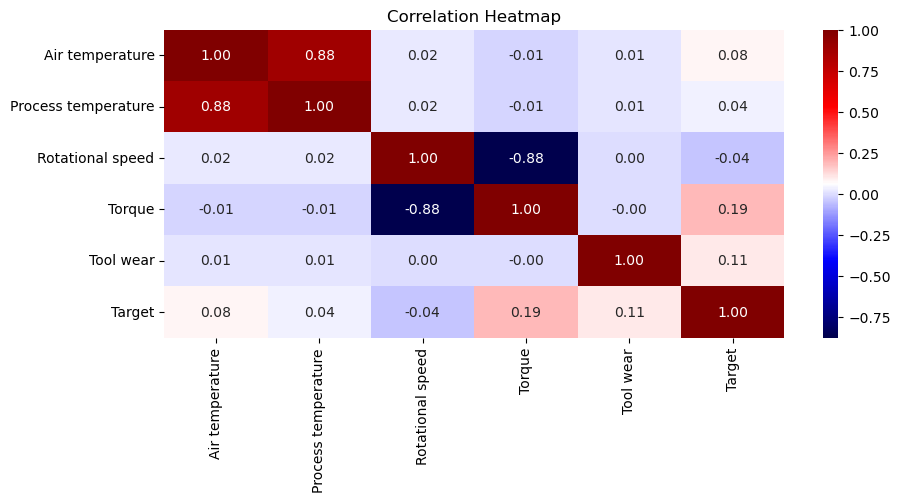

In [27]:
numeric_df = df.select_dtypes(include='number')
corr = numeric_df.corr()
plt.figure(figsize=(10, 4))
heatmap = sns.heatmap(corr, annot=True, fmt=".2f", cmap='seismic', cbar=True)
plt.title('Correlation Heatmap')
plt.show()

#### Replacing the 'type' column which is categorical values of Type column into numeric values.

In [29]:
df["Type"] = df["Type"].replace("L",0)
df["Type"] = df["Type"].replace("M",1)
df["Type"] = df["Type"].replace("H",2)

In [30]:
df

,Type,Air temperature,Process temperature,Rotational speed,Torque,Tool wear,Target
0,1,298.1,308.6,1551,42.8,0,0
1,0,298.2,308.7,1408,46.3,3,0
2,0,298.1,308.5,1498,49.4,5,0
3,0,298.2,308.6,1433,39.5,7,0
4,0,298.2,308.7,1408,40.0,9,0
...,...,...,...,...,...,...,...
9995,1,298.8,308.4,1604,29.5,14,0
9996,2,298.9,308.4,1632,31.8,17,0
9997,1,299.0,308.6,1645,33.4,22,0
9998,2,299.0,308.7,1408,48.5,25,0


### Feature Engineering

In [32]:
x = df.iloc[:,:-1]
x

,Type,Air temperature,Process temperature,Rotational speed,Torque,Tool wear
0,1,298.1,308.6,1551,42.8,0
1,0,298.2,308.7,1408,46.3,3
2,0,298.1,308.5,1498,49.4,5
3,0,298.2,308.6,1433,39.5,7
4,0,298.2,308.7,1408,40.0,9
...,...,...,...,...,...,...
9995,1,298.8,308.4,1604,29.5,14
9996,2,298.9,308.4,1632,31.8,17
9997,1,299.0,308.6,1645,33.4,22
9998,2,299.0,308.7,1408,48.5,25


In [33]:
y = df.iloc[:,-1]
y

0       0
1       0
2       0
3       0
4       0
       ..
9995    0
9996    0
9997    0
9998    0
9999    0
Name: Target, Length: 10000, dtype: int64

### Sampling

In [35]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(sampling_strategy='minority') 
x,y=smote.fit_resample(x,y)
y.value_counts()

Target
0    9661
1    9661
Name: count, dtype: int64

### Train Test Split

In [37]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x, y,test_size=0.2,random_state=42)

### Scaling

In [39]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Model Building

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import classification_report
from sklearn.ensemble import GradientBoostingClassifier

#### Function for Building Models

In [43]:
def mymodel(model):
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    train=model.score(X_train,y_train)
    test=model.score(X_test,y_test)
    print("Accuracy Score :",accuracy_score(y_test,y_pred))
    print(classification_report(y_pred,y_test))
    print(f"Trainig ac:{train}\nTesting ac:{test}\n")
    return model

#### 1. Logistic Regression

In [45]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

In [46]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score
ac = accuracy_score(y_test,y_pred)
ra = roc_auc_score(y_test,y_pred)
cm = confusion_matrix(y_test,y_pred)
cr = classification_report(y_test,y_pred)
print("Accuracy Score :",accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
train = logreg.score(X_train,y_train)
test = logreg.score(X_test,y_test)
print("Training Performance :",train)
print("Testing Performance :",test)

Accuracy Score : 0.8439844760672703
              precision    recall  f1-score   support

           0       0.84      0.84      0.84      1934
           1       0.84      0.84      0.84      1931

    accuracy                           0.84      3865
   macro avg       0.84      0.84      0.84      3865
weighted avg       0.84      0.84      0.84      3865

Training Performance : 0.8336675939703694
Testing Performance : 0.8439844760672703


##### Using Solvers

In [48]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver = 'liblinear')
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)


from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score
ac = accuracy_score(y_test,y_pred)
ra = roc_auc_score(y_test,y_pred)
cm = confusion_matrix(y_test,y_pred)
cr = classification_report(y_test,y_pred)
print("Accuracy Score :",accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
train = logreg.score(X_train,y_train)
test = logreg.score(X_test,y_test)
print("Training Performance :",train)
print("Testing Performance :",test)

Accuracy Score : 0.8439844760672703
              precision    recall  f1-score   support

           0       0.84      0.84      0.84      1934
           1       0.84      0.84      0.84      1931

    accuracy                           0.84      3865
   macro avg       0.84      0.84      0.84      3865
weighted avg       0.84      0.84      0.84      3865

Training Performance : 0.8336675939703694
Testing Performance : 0.8439844760672703


In [49]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver = 'saga')
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)


from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score
ac = accuracy_score(y_test,y_pred)
ra = roc_auc_score(y_test,y_pred)
cm = confusion_matrix(y_test,y_pred)
cr = classification_report(y_test,y_pred)
print("Accuracy Score :",accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
train = logreg.score(X_train,y_train)
test = logreg.score(X_test,y_test)
print("Training Performance :",train)
print("Testing Performance :",test)

Accuracy Score : 0.8439844760672703
              precision    recall  f1-score   support

           0       0.84      0.84      0.84      1934
           1       0.84      0.84      0.84      1931

    accuracy                           0.84      3865
   macro avg       0.84      0.84      0.84      3865
weighted avg       0.84      0.84      0.84      3865

Training Performance : 0.8336675939703694
Testing Performance : 0.8439844760672703


In [50]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver = 'newton-cholesky')
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)


from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score
ac = accuracy_score(y_test,y_pred)
ra = roc_auc_score(y_test,y_pred)
cm = confusion_matrix(y_test,y_pred)
cr = classification_report(y_test,y_pred)
print("Accuracy Score :",accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
train = logreg.score(X_train,y_train)
test = logreg.score(X_test,y_test)
print("Training Performance :",train)
print("Testing Performance :",test)

Accuracy Score : 0.8439844760672703
              precision    recall  f1-score   support

           0       0.84      0.84      0.84      1934
           1       0.84      0.84      0.84      1931

    accuracy                           0.84      3865
   macro avg       0.84      0.84      0.84      3865
weighted avg       0.84      0.84      0.84      3865

Training Performance : 0.8336675939703694
Testing Performance : 0.8439844760672703


In [51]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver = 'newton-cg')
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)


from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score
ac = accuracy_score(y_test,y_pred)
ra = roc_auc_score(y_test,y_pred)
cm = confusion_matrix(y_test,y_pred)
cr = classification_report(y_test,y_pred)
print("Accuracy Score :",accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
train = logreg.score(X_train,y_train)
test = logreg.score(X_test,y_test)
print("Training Performance :",train)
print("Testing Performance :",test)

Accuracy Score : 0.8439844760672703
              precision    recall  f1-score   support

           0       0.84      0.84      0.84      1934
           1       0.84      0.84      0.84      1931

    accuracy                           0.84      3865
   macro avg       0.84      0.84      0.84      3865
weighted avg       0.84      0.84      0.84      3865

Training Performance : 0.8336028983632011
Testing Performance : 0.8439844760672703


In [52]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver = 'lbfgs')
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)


from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score
ac = accuracy_score(y_test,y_pred)
ra = roc_auc_score(y_test,y_pred)
cm = confusion_matrix(y_test,y_pred)
cr = classification_report(y_test,y_pred)
print("Accuracy Score :",accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
train = logreg.score(X_train,y_train)
test = logreg.score(X_test,y_test)
print("Training Performance :",train)
print("Testing Performance :",test)

Accuracy Score : 0.8439844760672703
              precision    recall  f1-score   support

           0       0.84      0.84      0.84      1934
           1       0.84      0.84      0.84      1931

    accuracy                           0.84      3865
   macro avg       0.84      0.84      0.84      3865
weighted avg       0.84      0.84      0.84      3865

Training Performance : 0.8336675939703694
Testing Performance : 0.8439844760672703


#### 2. Naive Bayes

In [54]:
gb=GaussianNB()
br=BernoulliNB()

In [55]:
mymodel(gb)

Accuracy Score : 0.8266494178525227
              precision    recall  f1-score   support

           0       0.80      0.85      0.82      1830
           1       0.85      0.81      0.83      2035

    accuracy                           0.83      3865
   macro avg       0.83      0.83      0.83      3865
weighted avg       0.83      0.83      0.83      3865

Trainig ac:0.8251277738241574
Testing ac:0.8266494178525227



GaussianNB()

In [56]:
mymodel(br)

Accuracy Score : 0.759379042690815
              precision    recall  f1-score   support

           0       0.73      0.77      0.75      1836
           1       0.78      0.75      0.77      2029

    accuracy                           0.76      3865
   macro avg       0.76      0.76      0.76      3865
weighted avg       0.76      0.76      0.76      3865

Trainig ac:0.7555153005110953
Testing ac:0.759379042690815



BernoulliNB()

#### 3. Support Vector Machine

In [58]:
svm = SVC()

In [59]:
mymodel(svm)

Accuracy Score : 0.9371280724450194
              precision    recall  f1-score   support

           0       0.92      0.95      0.94      1861
           1       0.96      0.92      0.94      2004

    accuracy                           0.94      3865
   macro avg       0.94      0.94      0.94      3865
weighted avg       0.94      0.94      0.94      3865

Trainig ac:0.9343986543313709
Testing ac:0.9371280724450194



SVC()

#### 4. Decision Tree Classifier

In [61]:
dt = DecisionTreeClassifier()

In [62]:
mymodel(dt)

Accuracy Score : 0.9601552393272963
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1896
           1       0.97      0.95      0.96      1969

    accuracy                           0.96      3865
   macro avg       0.96      0.96      0.96      3865
weighted avg       0.96      0.96      0.96      3865

Trainig ac:1.0
Testing ac:0.9601552393272963



DecisionTreeClassifier()

##### Hyperparameter Tuning

In [64]:
for i in range(1,51):
    dt1=DecisionTreeClassifier(max_depth=i)
    dt1.fit(X_train,y_train)
    y_pred=dt1.predict(X_test)
    ac=accuracy_score(y_test,y_pred)
    print(f'Max depth={i} accuracy={ac}')

Max depth=1 accuracy=0.7759379042690815
Max depth=2 accuracy=0.830012936610608
Max depth=3 accuracy=0.8734799482535576
Max depth=4 accuracy=0.9241914618369987
Max depth=5 accuracy=0.9298835705045279
Max depth=6 accuracy=0.9350582147477361
Max depth=7 accuracy=0.9423027166882277
Max depth=8 accuracy=0.943078913324709
Max depth=9 accuracy=0.9459249676584734
Max depth=10 accuracy=0.9503234152652005
Max depth=11 accuracy=0.954980595084088
Max depth=12 accuracy=0.9544631306597672
Max depth=13 accuracy=0.9580853816300129
Max depth=14 accuracy=0.9596377749029754
Max depth=15 accuracy=0.9611901681759379
Max depth=16 accuracy=0.9604139715394566
Max depth=17 accuracy=0.9611901681759379
Max depth=18 accuracy=0.9606727037516171
Max depth=19 accuracy=0.96248382923674
Max depth=20 accuracy=0.963777490297542
Max depth=21 accuracy=0.96248382923674
Max depth=22 accuracy=0.9619663648124192
Max depth=23 accuracy=0.96248382923674
Max depth=24 accuracy=0.9614489003880983
Max depth=25 accuracy=0.96170763260

In [65]:
dt1=DecisionTreeClassifier(max_depth = 19 )
mymodel(dt1)

Accuracy Score : 0.9619663648124192
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1899
           1       0.97      0.95      0.96      1966

    accuracy                           0.96      3865
   macro avg       0.96      0.96      0.96      3865
weighted avg       0.96      0.96      0.96      3865

Trainig ac:0.9987060878566345
Testing ac:0.9619663648124192



DecisionTreeClassifier(max_depth=19)

In [66]:
for i in range(2,111):
    dt2=DecisionTreeClassifier(min_samples_split=i)
    dt2.fit(X_train,y_train)
    y_pred=dt2.predict(X_test)
    ac=accuracy_score(y_test,y_pred)
    print(f'Min sample split={i} accuracy={ac}')

Min sample split=2 accuracy=0.9622250970245796
Min sample split=3 accuracy=0.9583441138421733
Min sample split=4 accuracy=0.9598965071151359
Min sample split=5 accuracy=0.959379042690815
Min sample split=6 accuracy=0.9583441138421733
Min sample split=7 accuracy=0.9591203104786546
Min sample split=8 accuracy=0.9598965071151359
Min sample split=9 accuracy=0.9578266494178526
Min sample split=10 accuracy=0.9580853816300129
Min sample split=11 accuracy=0.9596377749029754
Min sample split=12 accuracy=0.9598965071151359
Min sample split=13 accuracy=0.9609314359637775
Min sample split=14 accuracy=0.9591203104786546
Min sample split=15 accuracy=0.9586028460543338
Min sample split=16 accuracy=0.9575679172056921
Min sample split=17 accuracy=0.9586028460543338
Min sample split=18 accuracy=0.9583441138421733
Min sample split=19 accuracy=0.9580853816300129
Min sample split=20 accuracy=0.9567917205692109
Min sample split=21 accuracy=0.9578266494178526
Min sample split=22 accuracy=0.9570504527813712
M

In [67]:
dt1=DecisionTreeClassifier(min_samples_split = 3)
mymodel(dt1)

Accuracy Score : 0.9601552393272963
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1916
           1       0.96      0.96      0.96      1949

    accuracy                           0.96      3865
   macro avg       0.96      0.96      0.96      3865
weighted avg       0.96      0.96      0.96      3865

Trainig ac:0.9982532186064567
Testing ac:0.9601552393272963



DecisionTreeClassifier(min_samples_split=3)

In [68]:
for i in range(2,111):
    dt3=DecisionTreeClassifier(min_samples_leaf=i)
    dt3.fit(X_train,y_train)
    y_pred=dt3.predict(X_test)
    ac=accuracy_score(y_test,y_pred)
    print(f'Min sample leaf={i} accuracy={ac}')

Min sample leaf=2 accuracy=0.9542043984476067
Min sample leaf=3 accuracy=0.9554980595084088
Min sample leaf=4 accuracy=0.9526520051746442
Min sample leaf=5 accuracy=0.9557567917205693
Min sample leaf=6 accuracy=0.9570504527813712
Min sample leaf=7 accuracy=0.9580853816300129
Min sample leaf=8 accuracy=0.9542043984476067
Min sample leaf=9 accuracy=0.9567917205692109
Min sample leaf=10 accuracy=0.9552393272962484
Min sample leaf=11 accuracy=0.954980595084088
Min sample leaf=12 accuracy=0.9544631306597672
Min sample leaf=13 accuracy=0.9539456662354463
Min sample leaf=14 accuracy=0.9560155239327296
Min sample leaf=15 accuracy=0.9557567917205693
Min sample leaf=16 accuracy=0.9521345407503234
Min sample leaf=17 accuracy=0.9498059508408797
Min sample leaf=18 accuracy=0.9469598965071151
Min sample leaf=19 accuracy=0.9433376455368694
Min sample leaf=20 accuracy=0.9435963777490297
Min sample leaf=21 accuracy=0.9451487710219922
Min sample leaf=22 accuracy=0.9441138421733506
Min sample leaf=23 acc

In [69]:
dt1=DecisionTreeClassifier(min_samples_leaf = 7)
mymodel(dt1)

Accuracy Score : 0.9565329883570505
              precision    recall  f1-score   support

           0       0.95      0.96      0.96      1902
           1       0.96      0.95      0.96      1963

    accuracy                           0.96      3865
   macro avg       0.96      0.96      0.96      3865
weighted avg       0.96      0.96      0.96      3865

Trainig ac:0.9735394966681762
Testing ac:0.9565329883570505



DecisionTreeClassifier(min_samples_leaf=7)

Using all tuned Hyperparameters

In [71]:
final_dt = DecisionTreeClassifier(max_depth = 19,min_samples_split = 3,min_samples_leaf = 7)

In [72]:
mymodel(final_dt)

Accuracy Score : 0.95627425614489
              precision    recall  f1-score   support

           0       0.95      0.96      0.96      1901
           1       0.96      0.95      0.96      1964

    accuracy                           0.96      3865
   macro avg       0.96      0.96      0.96      3865
weighted avg       0.96      0.96      0.96      3865

Trainig ac:0.9735394966681762
Testing ac:0.95627425614489



DecisionTreeClassifier(max_depth=19, min_samples_leaf=7, min_samples_split=3)

### Ensemble Learning Models

#### 1. Random Forest Classifier

In [75]:
rf = RandomForestClassifier()

In [76]:
mymodel(rf)

Accuracy Score : 0.9793014230271668
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1896
           1       0.99      0.97      0.98      1969

    accuracy                           0.98      3865
   macro avg       0.98      0.98      0.98      3865
weighted avg       0.98      0.98      0.98      3865

Trainig ac:1.0
Testing ac:0.9793014230271668



RandomForestClassifier()

#### 2. AdaBoost

In [78]:
ab = AdaBoostClassifier()

In [79]:
mymodel(ab)

Accuracy Score : 0.9146183699870634
              precision    recall  f1-score   support

           0       0.91      0.92      0.91      1928
           1       0.92      0.91      0.91      1937

    accuracy                           0.91      3865
   macro avg       0.91      0.91      0.91      3865
weighted avg       0.91      0.91      0.91      3865

Trainig ac:0.9177718832891246
Testing ac:0.9146183699870634



AdaBoostClassifier()

#### 3. Gradient Boost 

In [81]:
grb = GradientBoostingClassifier()
mymodel(gb)

Accuracy Score : 0.8266494178525227
              precision    recall  f1-score   support

           0       0.80      0.85      0.82      1830
           1       0.85      0.81      0.83      2035

    accuracy                           0.83      3865
   macro avg       0.83      0.83      0.83      3865
weighted avg       0.83      0.83      0.83      3865

Trainig ac:0.8251277738241574
Testing ac:0.8266494178525227



GaussianNB()

#### 4. XGBoost

In [83]:
xgb = XGBClassifier()

In [84]:
mymodel(xgb)

Accuracy Score : 0.9842173350582147
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1913
           1       0.99      0.98      0.98      1952

    accuracy                           0.98      3865
   macro avg       0.98      0.98      0.98      3865
weighted avg       0.98      0.98      0.98      3865

Trainig ac:0.9985120010351297
Testing ac:0.9842173350582147



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

### Table for Accuracies

In [86]:
from tabulate import tabulate
from sklearn.metrics import accuracy_score
models = {
    "Logistic Regression": logreg,
    "Guassian Naive Bayes": gb,
    "Bernoulli Naive Bayes": br,
    "SVM": svm,
    "Decision Tree": final_dt,
    "Random Forest": rf,
    "AdaBoost Classifier": ab,
    "Gradient Boost Classifier": grb,
    "XGBoost Classifier": xgb 
}

results = []

for model_name, model in models.items():
    model.fit(X_train, y_train)
    train_accuracy = accuracy_score(y_train, model.predict(X_train))
    test_accuracy = accuracy_score(y_test, model.predict(X_test))
    results.append({"Model": model_name, "Training Accuracy": train_accuracy, "Testing Accuracy": test_accuracy})

accuracy_table = pd.DataFrame(results)

print(tabulate(accuracy_table, headers='keys', tablefmt='grid'))


+----+---------------------------+---------------------+--------------------+
|    | Model                     |   Training Accuracy |   Testing Accuracy |
+====+===========================+=====================+====================+
|  0 | Logistic Regression       |            0.833668 |           0.843984 |
+----+---------------------------+---------------------+--------------------+
|  1 | Guassian Naive Bayes      |            0.825128 |           0.826649 |
+----+---------------------------+---------------------+--------------------+
|  2 | Bernoulli Naive Bayes     |            0.755515 |           0.759379 |
+----+---------------------------+---------------------+--------------------+
|  3 | SVM                       |            0.934399 |           0.937128 |
+----+---------------------------+---------------------+--------------------+
|  4 | Decision Tree             |            0.973539 |           0.955498 |
+----+---------------------------+---------------------+--------

[[1893   41]
 [  20 1911]]


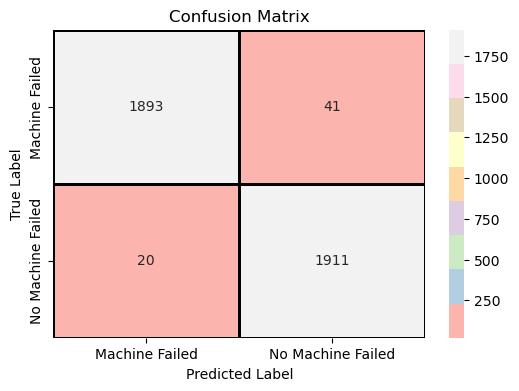

In [150]:
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(model, X_test, y_test):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    print(cm)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Pastel1", xticklabels=["Machine Failed", "No Machine Failed"], yticklabels=["Machine Failed", "No Machine Failed"],linewidths=1, linecolor='black')
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title("Confusion Matrix")
    plt.show()
plot_confusion_matrix(xgb, X_test, y_test)

### Input Function

In [152]:
def predictor():
    Type = int(input("Enter type of product based on quality.\nIf Low, enter 0.\nIf Medium, enter 1.\nIf High, enter 2.\nYou entered : "))
    Airtemp = eval(input("Enter Air Temperature in K : "))
    Protemp = eval(input("Enter Process Temperature in K : "))
    Rotsp = int(input("Enter Rotational Speed in RPM : "))
    Torq = eval(input("Enter Torque in Nm : "))
    Toolw = int(input("Enter Tool Wear in min : "))
    Tempdiff = Protemp-Airtemp
    
    newx = [Type,Airtemp,Protemp,Rotsp,Torq,Toolw]
    yp = xgb.predict([newx])[0]
    
    if yp==1:
        print("Machine Failed")
        return yp
    else:
        print("Machine didn't Fail")
        return yp

In [155]:
predictor()

Enter type of product based on quality.
If Low, enter 0.
If Medium, enter 1.
If High, enter 2.
You entered :  2
Enter Air Temperature in K :  298.4
Enter Process Temperature in K :  308.5
Enter Rotational Speed in RPM :  1782
Enter Torque in Nm :  23.9
Enter Tool Wear in min :  24


Machine Failed


1